<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/10_CNN(%EC%86%8C%EC%9B%A8%EC%9C%B5_12%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN을 사용한 이미지 분류

## 데이터 준비

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기
* 특성맵을 만드는 것이 핵심

In [3]:
model = keras.Sequential()

In [4]:
#특성값
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))#filter 수(임의지정),나머지는 이름 그대로
#활성함수는 kernel 이후 특성맵 생성 직전에 사용됨
model.add(keras.layers.MaxPooling2D(2))

In [5]:
#특성값
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))#filter 수(임의지정),나머지는 이름 그대로
#활성함수는 kernel 이후 특성맵 생성 직전에 사용됨
model.add(keras.layers.MaxPooling2D(2))

In [6]:
#분류층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

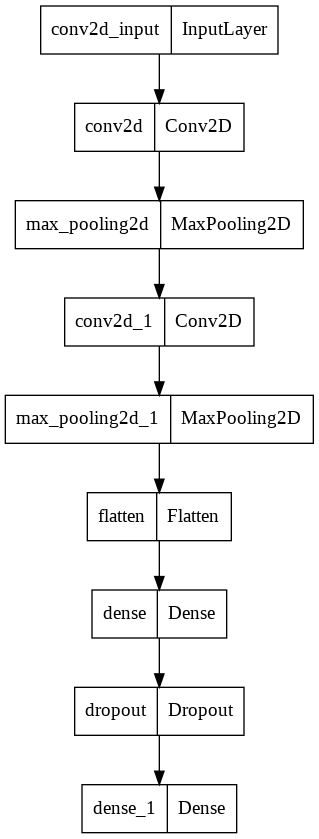

In [8]:
keras.utils.plot_model(model)

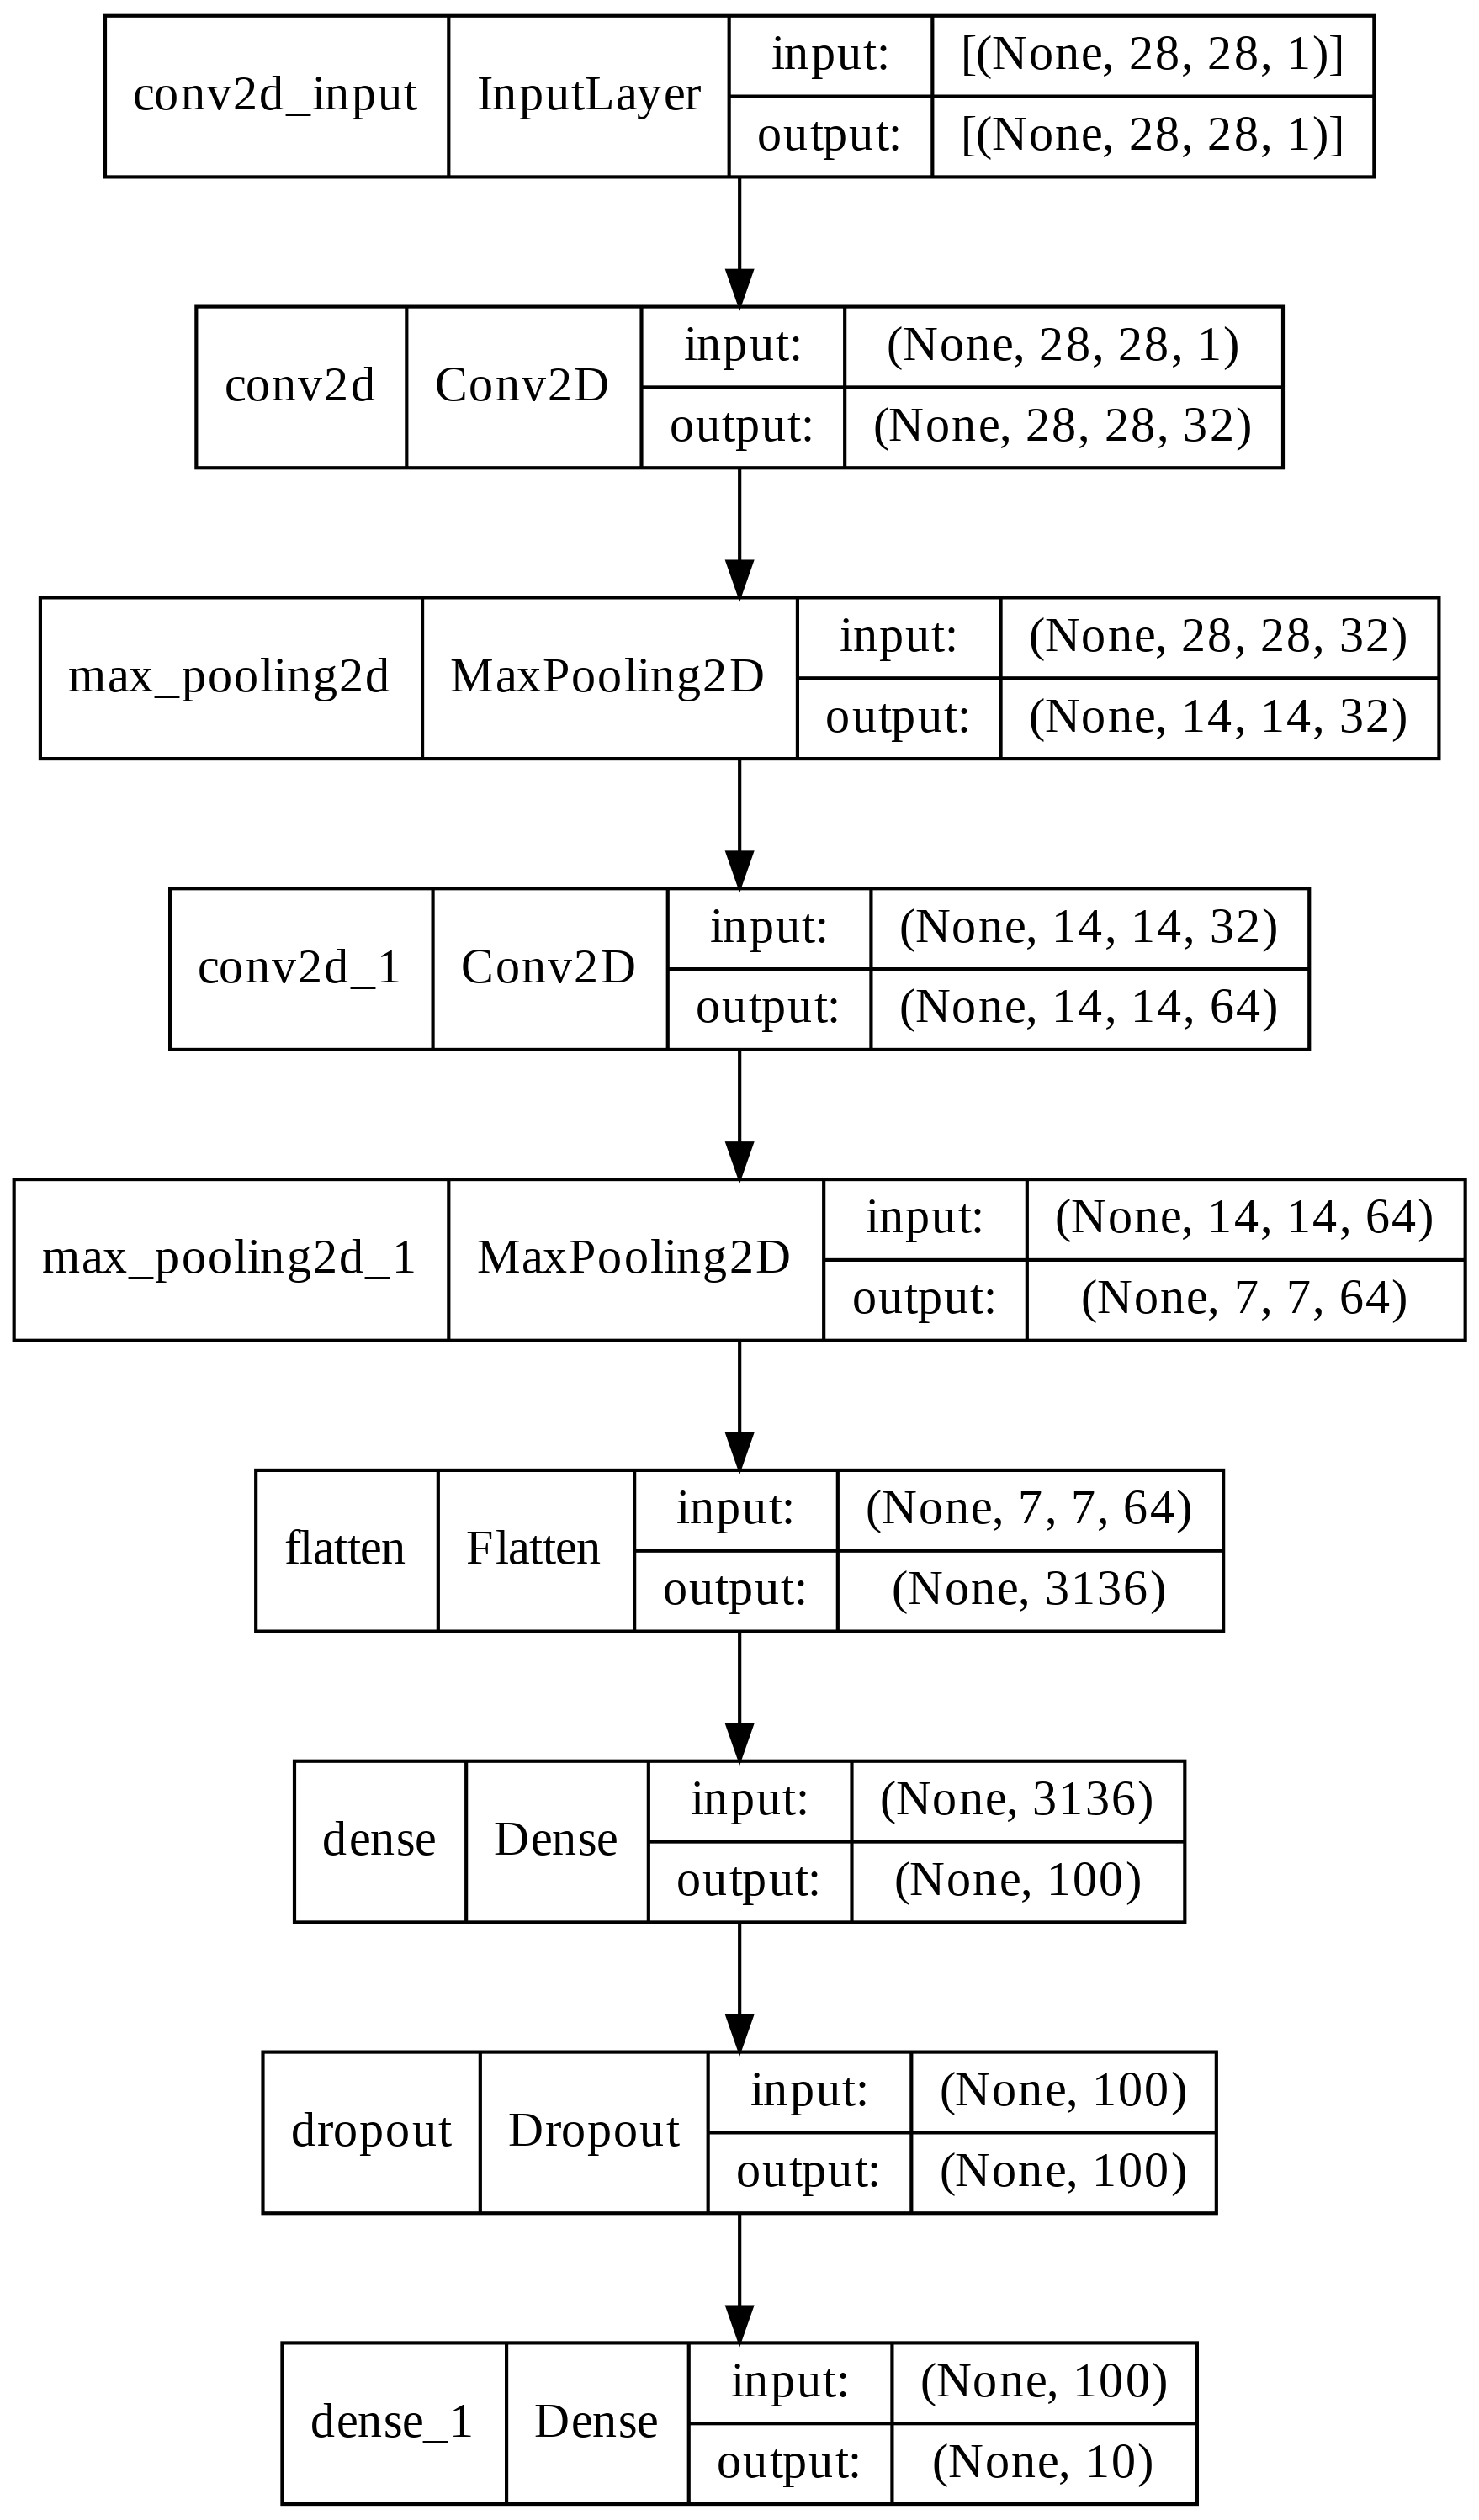

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 7ms/step - loss: 0.4987 - accuracy: 0.8198 - val_loss: 0.3184 - val_accuracy: 0.8843
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3301 - accuracy: 0.8826 - val_loss: 0.2860 - val_accuracy: 0.8918
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2806 - accuracy: 0.8971 - val_loss: 0.2554 - val_accuracy: 0.9064
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2512 - accuracy: 0.9087 - val_loss: 0.2477 - val_accuracy: 0.9083
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2275 - accuracy: 0.9165 - val_loss: 0.2360 - val_accuracy: 0.9137
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2045 - accuracy: 0.9249 - val_loss: 0.2264 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1865 - accuracy: 0.9315 - val_loss: 0.2156 - val_ac

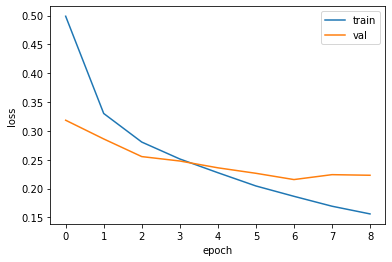

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 가중치 시각화

In [12]:
from tensorflow import keras

In [13]:
model = keras.models.load_model('best-cnn-model.h5')

In [14]:
model.layers

In [15]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [16]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.032496944 0.27038977


In [17]:
import matplotlib.pyplot as plt

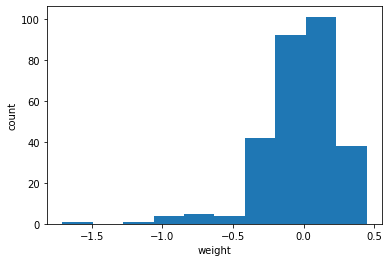

In [18]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

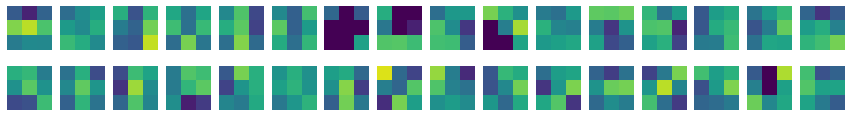

In [19]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

In [20]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [21]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [22]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.004398862 0.079662964


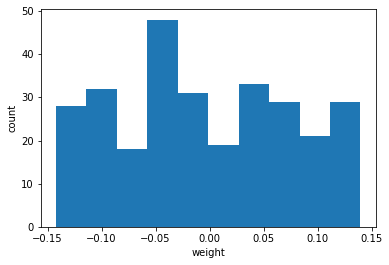

In [23]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

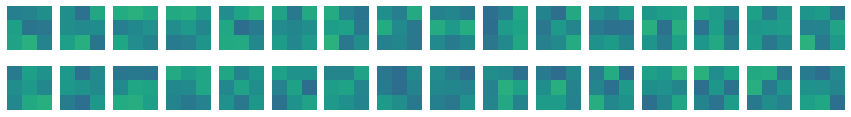

In [24]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

## 함수형 API

In [25]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [26]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [27]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

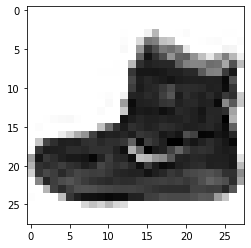

In [28]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [29]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [30]:
print(feature_maps.shape)

(1, 28, 28, 32)


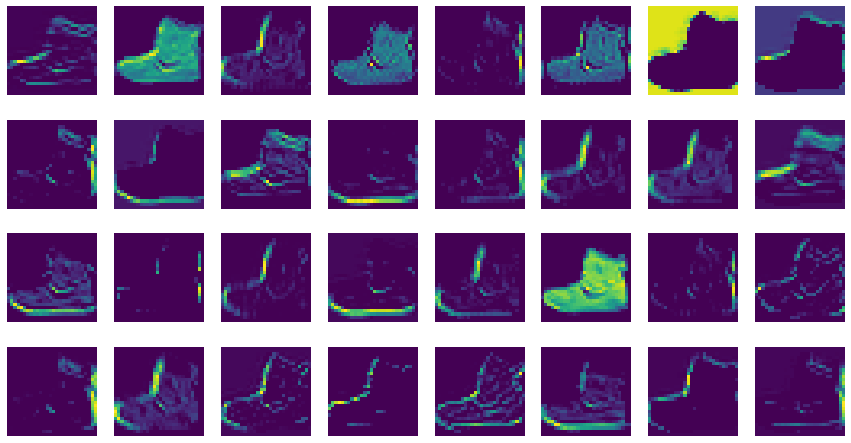

In [31]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')

plt.show()

In [32]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [33]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [34]:
print(feature_maps.shape)

(1, 14, 14, 64)


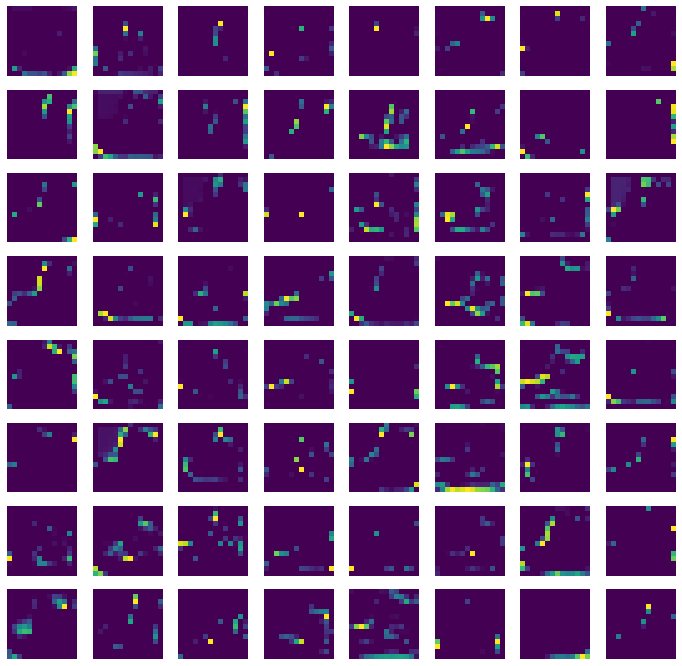

In [35]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')

plt.show()